In [1]:
import itertools
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("Downloads/airline-passengers.csv",index_col='month',parse_dates=True)
df.head()

,total_passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [17]:
df.describe()

,total_passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   total_passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [7]:
df.shape

(144, 1)

In [8]:
df.isnull().sum()

total_passengers    0
dtype: int64

In [21]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='month', length=144, freq=None)

In [22]:
df.index.freq='MS'

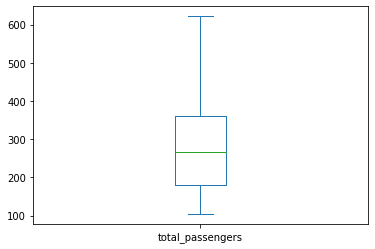

In [9]:
df.plot(kind='box')
plt.show()

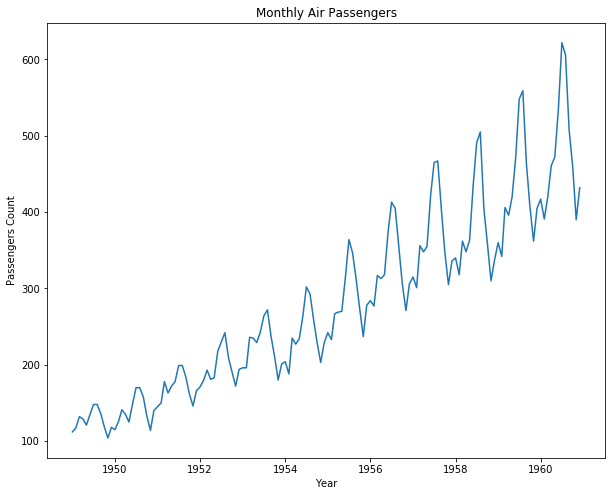

In [11]:
plt.figure(figsize=(10,8))
plt.plot(df)
plt.xlabel('Year')
plt.ylabel("Passengers Count")
plt.title('Monthly Air Passengers')
plt.show()

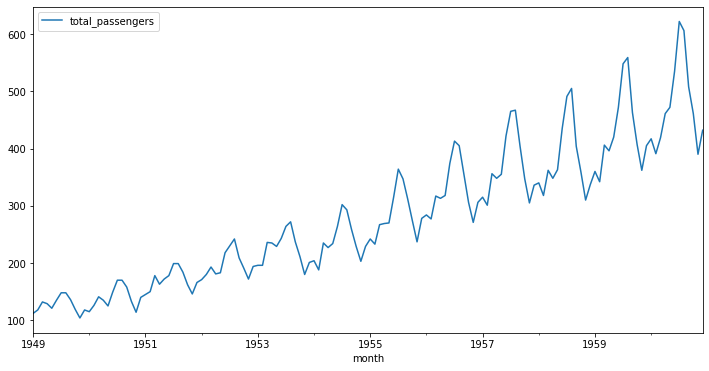

In [14]:
df.plot(figsize=(12,6))
plt.show()

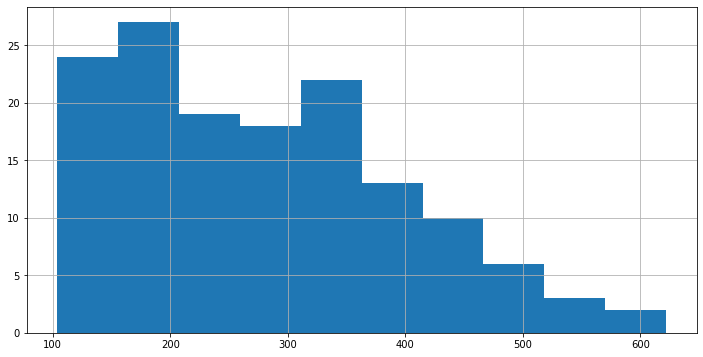

In [19]:
df['total_passengers'].hist(figsize=(12,6))
plt.show()

In [23]:
train=df[:120]
test=df[120:0]

In [29]:
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

test_stationarity(train["total_passengers"])


Results of Dickey-Fuller Test:
Test Statistic                  -0.773461
p-value                          0.826794
#Lags Used                      13.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


In [31]:
adf_test=adfuller(df['total_passengers'])
adf_test

(0.8153688792060544,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [32]:
print('ADF stats: %f' % adf_test[0])
print('p-value: %f' %adf_test[1])

ADF stats: 0.815369
p-value: 0.991880
